# Exploratory Data Analysis

In [18]:
import pandas as pd
import json

# 1. 显示所有列 (不再显示 ...)
pd.set_option('display.max_columns', None)

# 2. 显示所有行 (慎用！如果数据有几万行，会让 VS Code 变卡)
pd.set_option('display.max_rows', None)

# 3. 显示单元格完整内容 (关键！查看 Steam 长评论时必须设置)
# 默认情况下，长文本会被截断为 "The game is..."
pd.set_option('display.max_colwidth', None)


### 查看数据结构
1. 列名与数量：明确数据集包含的字段类型（如标识类、数值类、文本类）。
2. 数据规模：确认数据集共 27075 条游戏数据。

In [19]:
# steam_.csv是2019年及之前的数据（清洗好了），可用于了解Steam游戏的基本情况和=，做基本统计分析
steam_df=pd.read_csv('raw_data/steam_.csv')
print(steam_df.head())

   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                                                     categories  \
0  Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled   
1  Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Chea

In [20]:
steam_df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [21]:
# steam_df['genres'].value_counts()

### 查看缺失值
1. 各项没有缺失值 → steam_.csv这个文件是洗好的数据，无需额外处理缺失值

In [22]:
# 检查缺失值
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [24]:
cleaned_steam_df = steam_df.dropna(subset=['price', 'categories', 'genres'])

In [25]:
steam_df[steam_df['name'].isnull()]['categories']

Series([], Name: categories, dtype: object)

### 数值型数据描述统计
1. 基础统计量计算：
- 获取数值型字段（成就数、点赞数、点踩数、游玩时长、owner 数量、价格等）的统计信息 → 包含计数、均值、标准差、最小值、25%/50%/75% 分位数、最大值。
- 关键发现：
    - English 字段：25% 分位数为 1，最大值为 1，最小值为 0 → 超过 3/4 的游戏支持英语。
    - 年龄要求字段：大部分值为 0，最大值为 10 → 多数游戏无年龄限制。
    - 成就数字段：25% 分位数为 23，最大值为 9000 → 成就数分布极不平衡，少数游戏成就数远高于多数游戏。
    - 点赞与点踩：点赞数最大值约 200 万，点踩数约 440 → 点赞数与点踩数相差一个数量级，符合用户行为常识（不喜欢通常不主动点踩）。
    - 游玩时长：中位数为 0 → 大量游戏存在 “无用户游玩记录” 的情况。
    - 价格字段：数值分布较平缓，无极端异常值 → 无需处理价格字段的数值溢出问题。

In [26]:
steam_df.describe()

# 为什么游玩时间很多是0

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


### 时间相关字段处理（特征工程）
1. 时间字段拆分：将 “release date”（发布日期）分解为 “release date_year”（发布年）、“release date_month”（发布月）

In [27]:
# release_date 分解为年，月，日 
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['release_year'] = steam_df['release_date'].dt.year
steam_df['release_month'] = steam_df['release_date'].dt.month
steam_df['release_day'] = steam_df['release_date'].dt.day



numeric_cols = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
category_cols = ['release_year', 'release_month', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'owners',]

### 数值型数据分布可视化
1. 分布类型选择：绘制密度图，便于观察数值分布趋势。
2. 无效字段排除：未将 “APPID”（游戏唯一标识）纳入数值型可视化 → APPID 为标识类字段，无分布分析意义，避免干扰分析结果。
3. 分布结果：
- 多数数值字段（成就数、点赞数、owner 数量、游玩时长）无正态分布特征 → 数据分布 “尖峰” 明显，存在极端值（如少数游戏点赞数极高）。
- 价格字段分布相对平缓 → 稍微有一点标准正态分布的样子，数据平衡性优于其他数值字段。

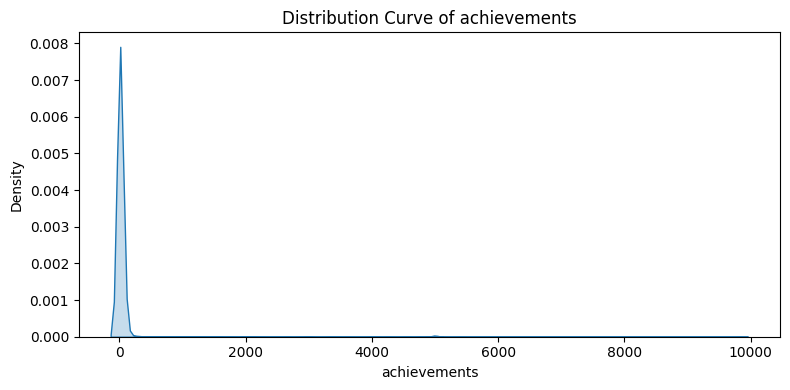

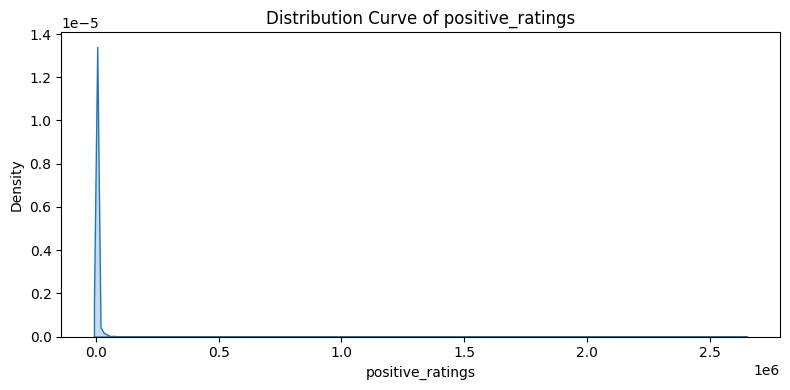

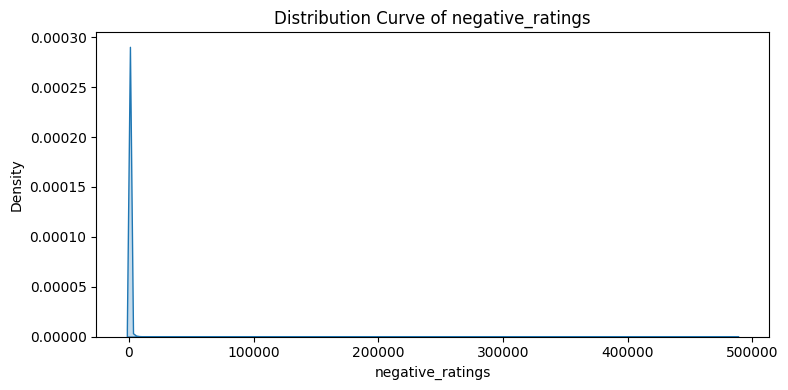

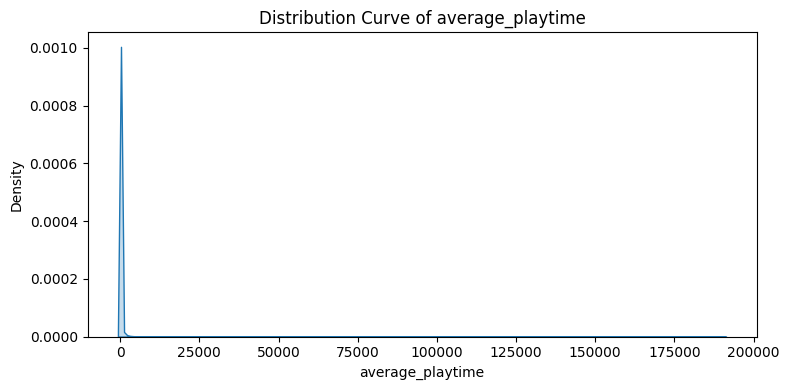

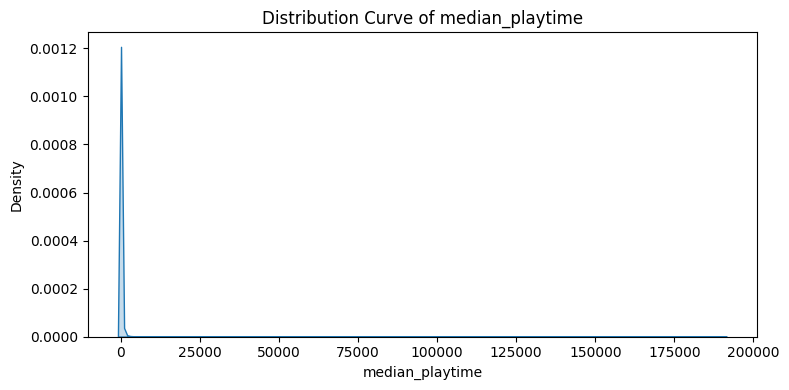

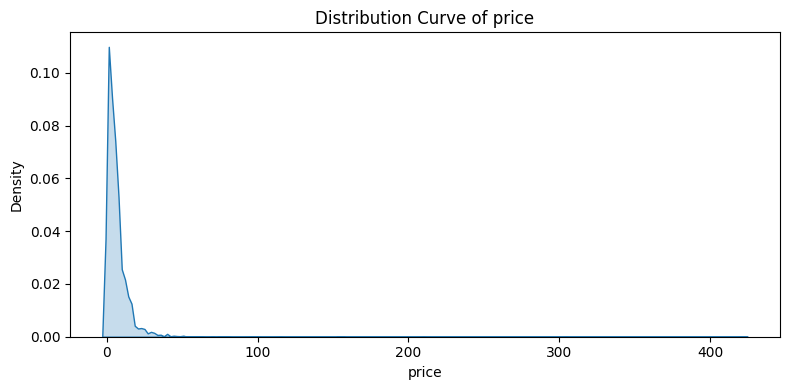

In [28]:



import matplotlib.pyplot as plt
import seaborn as sns

# 用seaborn绘制每个数值列的分布曲线图
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(steam_df[col].dropna(), fill=True)
    plt.title(f'Distribution Curve of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


### 类别型数据处理（数据类型指定）
1. 人工指定类别列：排除系统默认的 “数值型判断”，手动将以下字段划分为类别型数据 → 确保分析维度准确：
- 时间类：发布日期（release date）
- 标识类：游戏名（name）、开发者（Developer）、发行商（Publisher）、平台（platforms）、游戏类别（categories）、标签（tags）
- 布尔 / 离散类：是否支持英语（English）、年龄要求（required age）
- 特殊字段处理：将 “required age”（年龄要求）划分为类别型 → 虽为数字，但取值少（0、10、15、18 等），更适合按离散类别分析。
2. 核心发现：
- 时间序列（下图1）：随着时间发展，每年发布的游戏数量呈增长趋势，符合行业常识
- 发布月份分布（下图2）：游戏发布月份的占比相对均匀，无极端集中的月份，仅 3 月占比略高（9.5%）、6 月占比稍低（6.5%），未体现明显的 “游戏展集中发布” 规律。
- 英语支持情况（下图3）：Steam 平台上绝大多数游戏（98.1%）支持英语，仅 1.9% 的游戏不支持英语，英语是该平台的主流支持语言。

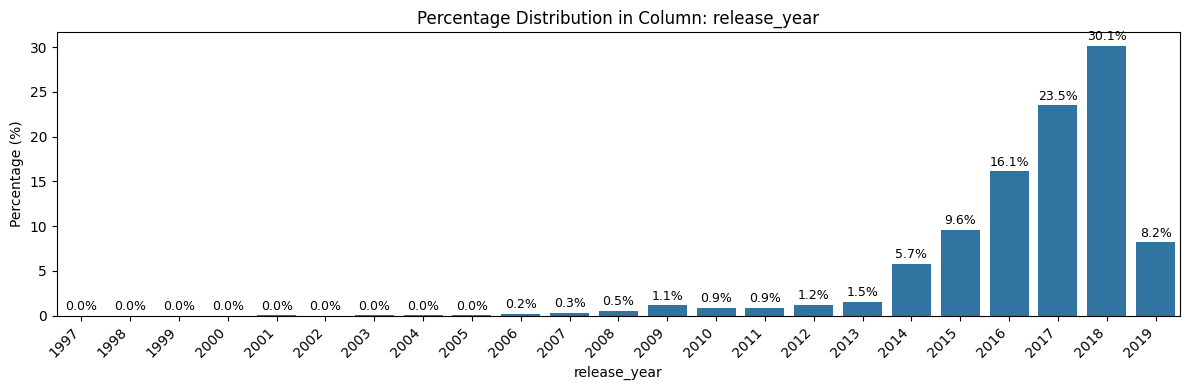

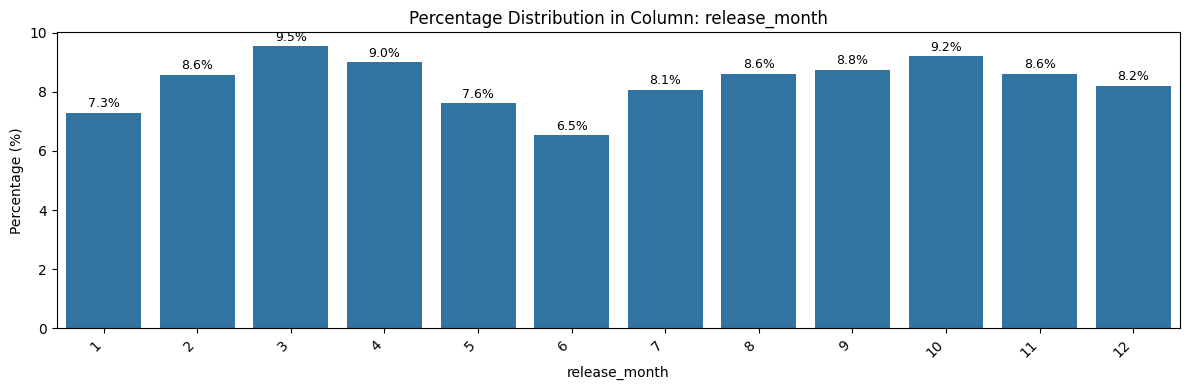

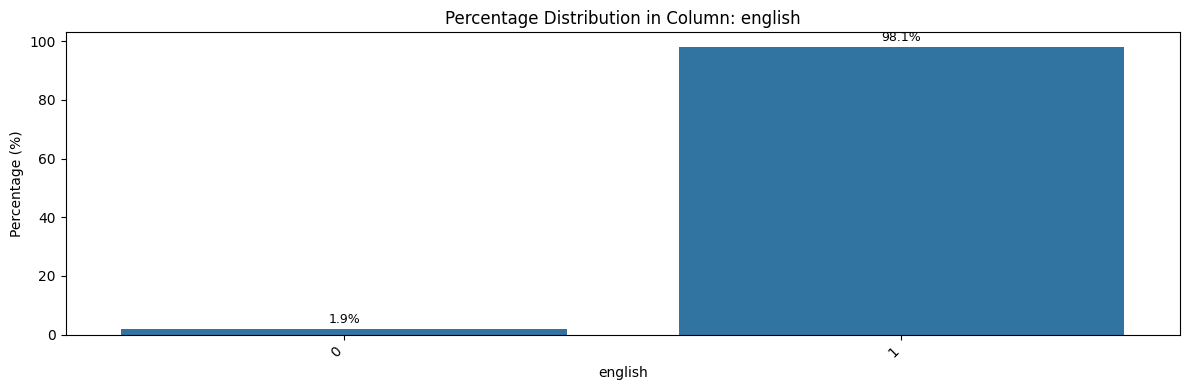

C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 27225 (\N{CJK UNIFIED IDEOGRAPH-6A59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\12984\AppData\Local\Temp\ipykernel_15724\4089758164.py:16: UserWarning: Glyph 20912 (\

In [ ]:
# 可视化类别数据的百分比图（显示所有类别）
for col in category_cols:
    # 计算各类别占比
    vc = steam_df[col].value_counts(normalize=True) * 100
    plot_data = vc.copy()
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x=plot_data.index, y=plot_data.values)
    plt.title(f'Percentage Distribution in Column: {col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, xytext=(0, 2), textcoords='offset points')
    plt.tight_layout()
    plt.show()


### 数据异常与待解决问题
1. 游玩时长异常：多数游戏 “平均游玩时长” 为 0 → 推测可能是 “无用户游玩记录” 或数据采集遗漏，暂不删除该类数据，后续若模型效果差需回溯处理。
2. 数据年份陈旧：当前数据集仅覆盖至 2019 年 → 需重新下载 2025 年最新 Steam 数据集，避免因数据时效性不足影响推荐系统效果。
3. 字段格式不统一：“支持语言” 字段包含星号等不规则符号，“DLC” 字段部分为空 → 需进一步清洗格式，补充缺失的 DLC 数量信息（如无 DLC 则标记为 0）。

### 数据更新与补充需求
1. 替换旧数据：因现有数据仅到 2019 年，计划下载 2025 年 Steam 新数据集（如 Steam Games.csv）→ 新数据集虽仅 7967 条数据，但年份更新，更符合当前游戏市场情况。
2. 处理 JSON 格式数据：若新数据为 JSON 格式（如包含游戏配置要求、截图、宣传片链接的原始数据）→ 需将 JSON 转为 CSV，提取核心字段（如 PC 配置等级、是否免费、游戏类型）补充至原有数据集，丰富分析维度。
